### Text Visualization
Nama : Muhammad Alfhi Saputra <br>
NIM : 1301171205


#### Import libraries

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re
import requests

#### Import dataset
Dataset yang digunakan adalah kumpulan tweet yang relevan mengenai kasus bantuan kuota internet

In [2]:
url = "https://raw.githubusercontent.com/alfhi24/Visualisasi-Data/main/Text%20Visualization/Task/data_tweets01.csv"
df = pd.read_csv(url)
df.head()

,User ID,Name,User,Text,Created At,Location,Retweet Count,Fav Count
0,1163060730590982144,kabel // kinda ia💘👋,wllyh_,dhlh bingung gmna utk kuliah besok lusa dan st...,2020-09-30 13:26:11,NaN,0,0
1,1289956071537172484,orangcanteeq,siapaakooo,@collegemenfess Kuota bantuan indosat lemot gi...,2020-09-30 13:23:30,NaN,0,0
2,1171388755,nes🌙,lattetrash,"RT @collegemenfess: [cm] Alhamdulillah, Indosa...",2020-09-30 13:21:02,NaN,7,0
3,548904824,Indosat Ooredoo Care,IndosatCare,"@ovienndt Hai Kak Ovie, maaf nih atas kendalan...",2020-09-30 13:06:19,NaN,0,0
4,1201845514259484672,celo,xholtmaan,"bulan kmren gue dpet subsidi kuota dr sekolah,...",2020-09-30 13:05:48,NaN,0,0


#### Preprocessing data

In [3]:
data = pd.DataFrame()

In [4]:
# Menghapus username dan url pada tweet
def extract(tweet):
    return re.sub(r"(?:\@|https?\://)\S+", "", tweet)
data['text'] = df['Text'].apply(lambda x: extract(x))

In [5]:
# lowercasing, menghapus angka, simbol, spasi di akhir
data['text'] = data['text'].str.replace('[^\w\s]','')
data['text'] = data['text'].str.replace('\d+', '')
data['text'] = data['text'].str.lower()
data['text'] = data['text'].str.replace(r'[^a-zA-Z ]+', '')
data['text'] = data['text'].str.strip()

In [6]:
text = " ".join(tweet for tweet in data['text'])
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 424939 words in the combination of all tweets.


#### Visualisasi teks menggunakan Word Cloud

In [7]:
# Import stopwords bahasa indonesia menggunakan Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords_id = factory.get_stop_words()
print(stopwords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

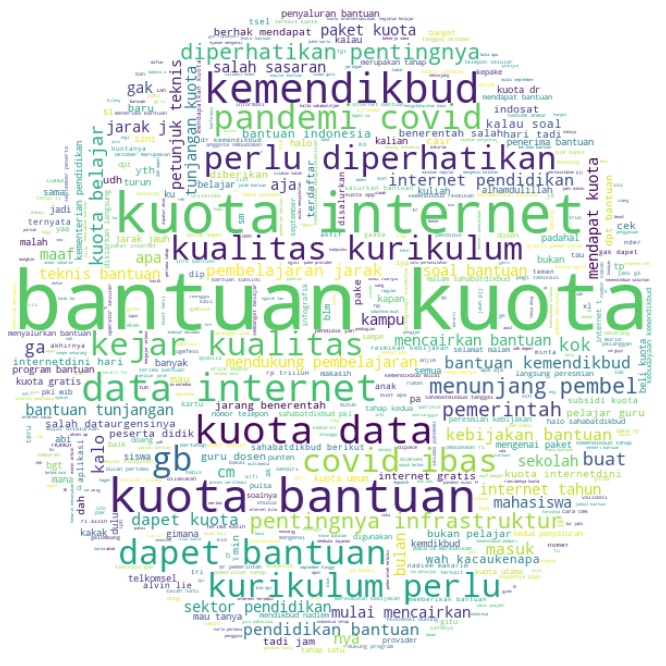

In [8]:
# Visualisasi word cloud
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/a/9/3/e/1194984754884631372button-blue_benji_park_01.svg.hi.png', stream=True).raw))
stopwords = set(STOPWORDS)
stopwords.update(stopwords_id)
stopwords.update(['yg', 'rt', 'hai', 'kak', 'sih', 'udah', 'aku', 'kamu', 'gue', 'gua', 'gw', 'kan', 'nih', 'lo'])
wc = WordCloud( stopwords=stopwords,
               mask=mask, background_color="white",
               max_words=1000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()